In [144]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import requests as req
import json
from citipy import citipy

#Observed Trend 1:
#Observed Trend 2:
#Observed Trend 3:

In [150]:
url = "http://api.openweathermap.org/data/2.5/weather?"
myweatherkey = '383110043a1d03ca838185f17b637183'
units = "imperial"
location_df = pd.DataFrame()
query_url = url + "appid=" + myweatherkey + "&units=" + units + "&q="

In [151]:
#Create list of random latutudes and longitudes
for x in range(600):
    rand_latitude = np.random.uniform(low=-90.000,high=90.000,size=1)
    rand_longitude = np.random.uniform(low=-180.000,high=180.000,size=1)
    random_loc = pd.DataFrame([[rand_latitude,rand_longitude]],columns=['latitude','longitude']).astype(float)
    location_df = location_df.append(random_loc)
my_location_df = location_df.reset_index()
my_location_df.head(3)

,index,latitude,longitude
0,0,-28.272348,-83.127809
1,0,63.416037,81.333573
2,0,4.455189,9.744819


In [152]:
#Create random list of cities
citylist = []
row = 0
while row <600:
    latitude = my_location_df['latitude'][row]
    longitude = my_location_df['longitude'][row]
    city=citipy.nearest_city(latitude,longitude)
    cityname = city.city_name
    country_code = city.country_code
    
    if city not in citylist:
        citylist.append([cityname,country_code,latitude,longitude])
    row += 1

In [153]:
citylist_df = pd.DataFrame(citylist,columns=['cityname','country_code','latitude','longitude'])
city_length = len(citylist_df['cityname'])
print(len(citylist_df['cityname']))

600


In [154]:
#Create empty URL list
url_list = []   
cities = citylist_df['cityname']
cities_list = list(cities.values.flatten())

In [156]:
index = 0
for c in cities_list:
    city = c
    url_id = query_url+str(c)
    print("Record " + str(index+1) + " of " + str(city_length) + " " + str(c))
    print(url_id)
    url_list.append(url_id)  
    index +=1
url_list

Record 1 of 600 coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=coquimbo
Record 2 of 600 krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=krasnoselkup
Record 3 of 600 yabassi
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=yabassi
Record 4 of 600 rosetta
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=rosetta
Record 5 of 600 dunedin
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=dunedin
Record 6 of 600 vaini
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=vaini
Record 7 of 600 nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=nikolskoye
Record 8 of 600 port alfred
http://api.op

['http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=coquimbo',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=krasnoselkup',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=yabassi',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=rosetta',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=dunedin',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=vaini',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=nikolskoye',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03ca838185f17b637183&units=imperial&q=port alfred',
 'http://api.openweathermap.org/data/2.5/weather?appid=383110043a1d03

In [157]:
print(len(url_list))

600


In [158]:
#for c in cities_list:
    #url_id = "{}q={}&appid={}&units=imperial".format(url,c,myweatherkey)
    #url_list.append(url_id)   
#url_list

In [159]:
weather_json_l = []

for city in url_list:
    response = req.get(city).json()
    if response=={'cod': '404', 'message': 'city not found'}:
       continue
    weather_json_l.append(response)
    
weather_json_l

[{'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -29.95, 'lon': -71.34},
  'dt': 1519675200,
  'id': 3893629,
  'main': {'humidity': 64,
   'pressure': 1016,
   'temp': 68,
   'temp_max': 68,
   'temp_min': 68},
  'name': 'Coquimbo',
  'sys': {'country': 'CL',
   'id': 4666,
   'message': 0.0043,
   'sunrise': 1519641290,
   'sunset': 1519687247,
   'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
    'icon': '03d',
    'id': 802,
    'main': 'Clouds'}],
  'wind': {'deg': 280, 'speed': 10.29}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 4.46, 'lon': 9.97},
  'dt': 1519675200,
  'id': 2221046,
  'main': {'humidity': 100,
   'pressure': 1011,
   'temp': 77,
   'temp_max': 77,
   'temp_min': 77},
  'name': 'Yabassi',
  'sys': {'country': 'CM',
   'id': 6743,
   'message': 0.0038,
   'sunrise': 1519623130,
   'sunset': 1519666416,
   'type': 1},
  'visibility': 10000,
  'weather': [{'des

In [161]:
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp") for data in weather_json_l]
city = [data.get("name") for data in weather_json_l]
humidity = [data.get("main").get('humidity') for data in weather_json_l]
wind_speed = [data.get('wind').get('speed') for data in weather_json_l]
cloudiness = [data.get('clouds').get('all') for data in weather_json_l]

In [162]:
weather_dict = {"Temperature (Fahrenheit)": temp_data, 
                "Latitude": lat_data,
                "city":city,
                "humidity":humidity,
                "wind speed":wind_speed,
                "Clouds":cloudiness}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Clouds,Latitude,Temperature (Fahrenheit),city,humidity,wind speed
0,40,-29.95,68.00,Coquimbo,64,10.29
1,40,4.46,77.00,Yabassi,100,3.38
2,40,31.40,60.80,Rosetta,87,9.17
3,36,-45.87,50.30,Dunedin,94,3.94
4,0,15.34,60.42,Vaini,41,3.83


In [163]:
weather_df.set_index("city", inplace=True)
weather_df.head()

,Clouds,Latitude,Temperature (Fahrenheit),humidity,wind speed
city,,,,,
Coquimbo,40,-29.95,68.00,64,10.29
Yabassi,40,4.46,77.00,100,3.38
Rosetta,40,31.40,60.80,87,9.17
Dunedin,36,-45.87,50.30,94,3.94
Vaini,0,15.34,60.42,41,3.83


In [165]:
print(len(weather_df['Clouds']))

543


<function matplotlib.pyplot.show>

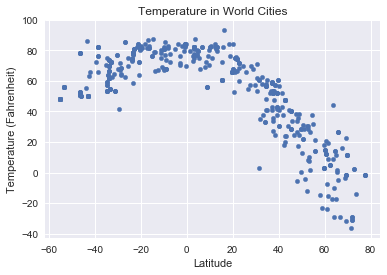

In [166]:
ax_temp = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Temperature (Fahrenheit)",
                marker="o",
                title="Temperature in World Cities",
                grid=True);
sea.set()

fig = ax_temp.get_figure()
fig.savefig("TemperatureWorldCities1.png");

plt.show

<function matplotlib.pyplot.show>

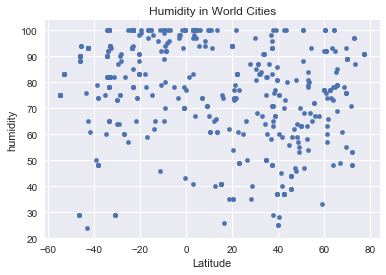

In [167]:
ax_humidity = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="humidity",
                marker="o",
                title="Humidity in World Cities",
                grid=True);

sea.set()

fig = ax_humidity.get_figure()
fig.savefig("HumidityWorldCities1.png");

plt.show

<function matplotlib.pyplot.show>

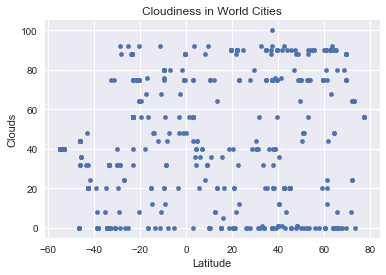

In [168]:
ax_cloudiness = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Clouds",
                marker="o",
                title="Cloudiness in World Cities",
                grid=True);

sea.set()

fig = ax_humidity.get_figure()
fig.savefig("CloudsWorldCities1.png");

plt.show

<function matplotlib.pyplot.show>

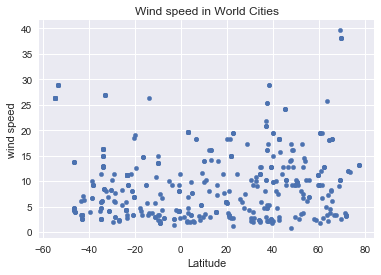

In [169]:
ax_wind_speed = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="wind speed",
                marker="o",
                title="Wind speed in World Cities",
                grid=True);
sea.set()

fig = ax_wind_speed.get_figure()
fig.savefig("HumidityWorldCities1.png");

plt.show

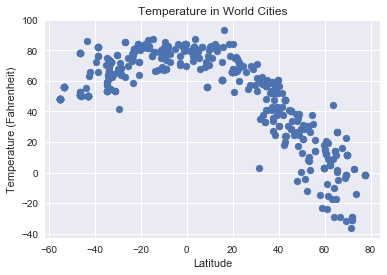

In [170]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature (Fahrenheit)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities2.png")

# Show plot
plt.show()